In [1]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.utils import shuffle 
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
import keras
from keras.utils import to_categorical
import os
from keras.layers import *
from keras.models import Sequential, Model
from keras import optimizers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
def parse_arff(filename):
	try:
		file = open(filename)
	except:
		print('file could not found or opened, try with file location')
	columns = []
	data = []

	for line in file:
		if line.startswith('@attribute'):
			line = line.strip()
			temp = line.split()
			columns.append(temp[1])
		elif line.startswith('@') or line.startswith('\n'):
			continue
		else:
			line = line.strip()
			temp = line.split(',')
			data.append(temp)

	return data,columns

In [4]:
test_sizes = [0.15, 0.2, 0.25, 0.3, 0.35]

In [5]:
data, columns = parse_arff('./Training Dataset.arff')
df = pd.DataFrame(data, columns = columns, dtype=np.int8)

In [6]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C = [1, 2, 3, 4, 5] # regularization parameter
degree = [1, 2, 3, 4, 5, 6] # polinomial degree
gamma = ['scale', 'auto']
decision_function_shape = ['ovo', 'ovr']

In [7]:
losses = ['hinge', 'squared_hinge']
penalty = ['l2']
C = [1, 2, 3, 4, 5] # regularization parameter
multi_class = ['ovr', 'crammer_singer']

In [8]:
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
metric = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

In [9]:
max_features = [None, 'auto', 'sqrt', 'log2']
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
bootstrap  = [True, False]
class_weight = [None, 'balanced', 'balanced_subsample']
warm_start = [True, False]

In [10]:
alpha = [0,1.,2.,3.,4.,5.,7.,9.,11.]
binarize = [0,1.,2.,3.,4.,5.,7.,9.,11.] #BernoulliNB
fit_prior = [True, False]

In [11]:
svc_models = []
lsvc = []
knn = []
bnbmodels = []
randomforest = []
dtree = []

In [12]:
for size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = size)
    x_train = np.array(x_train).astype(np.int8)
    y_train = np.array(y_train).astype(np.int8)
    x_test = np.array(x_test).astype(np.int8)
    y_test = np.array(y_test).astype(np.int8)
    y_train = np.where(y_train == -1, 0, y_train)
    y_test = np.where(y_test == -1, 0, y_test)
    ###############################################
    for kernel in kernels:
        for c in C:
            for deg in degree:
                for gam in gamma:
                    for decision in decision_function_shape:
                        svc_models.append(SVC(kernel = kernel, C = c, degree = deg, gamma = gam, decision_function_shape=decision).fit(x_train, y_train))
    ###############################################
    for loss in losses:
        for c in C:
            for multi in multi_class:
                lsvc.append(LinearSVC(loss = loss, penalty = 'l2', C = c, multi_class = multi).fit(x_train, y_train))
    ###############################################
    for k in range(1, 10):
        for weight in weights:
            for algo in algorithm:
                for m in metric:
                    knn.append(KNeighborsClassifier(n_neighbors=k, weights = weight, algorithm = algo, metric=m).fit(x_train, y_train))
    ###############################################
    for a in alpha:
        for b in binarize:
            for fit in fit_prior:
                bnbmodels.append(BernoulliNB(alpha = a, binarize = b, fit_prior = fit).fit(x_train, y_train))
    ###############################################    
    for weight in class_weight:
        for maxx in max_features:
            for cri in criterion:
                for s in warm_start:
                    randomforest.append(RandomForestClassifier(warm_start = s, class_weight=weight, max_features = maxx, criterion = cri).fit(x_train, y_train))
    ###############################################    
    for weight in class_weight[:-1]:
        for maxx in max_features:
            for cri in criterion:
                for split in splitter:
                    dtree.append(DecisionTreeClassifier(class_weight = weight, max_features=maxx, splitter = split, criterion = cri).fit(x_train, y_train))

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\hp\appdata\local\programs\python\python

KeyboardInterrupt: 

In [24]:
svc_models = svc_models[:1440]

In [25]:
for size in test_sizes[3:]:
    x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = size)
    x_train = np.array(x_train).astype(np.int8)
    y_train = np.array(y_train).astype(np.int8)
    x_test = np.array(x_test).astype(np.int8)
    y_test = np.array(y_test).astype(np.int8)
    y_train = np.where(y_train == -1, 0, y_train)
    y_test = np.where(y_test == -1, 0, y_test)
    ###############################################
    for kernel in kernels:
        for c in C:
            for deg in degree:
                for gam in gamma:
                    for decision in decision_function_shape:
                        svc_models.append(SVC(kernel = kernel, C = c, degree = deg, gamma = gam, decision_function_shape=decision).fit(x_train, y_train))
    ###############################################
    for loss in losses:
        for c in C:
            for multi in multi_class:
                lsvc.append(LinearSVC(loss = loss, penalty = 'l2', C = c, multi_class = multi).fit(x_train, y_train))
    ###############################################
    for k in range(1, 10):
        for weight in weights:
            for algo in algorithm:
                for m in metric:
                    knn.append(KNeighborsClassifier(n_neighbors=k, weights = weight, algorithm = algo, metric=m).fit(x_train, y_train))
    ###############################################
    for a in alpha:
        for b in binarize:
            for fit in fit_prior:
                bnbmodels.append(BernoulliNB(alpha = a, binarize = b, fit_prior = fit).fit(x_train, y_train))
    ###############################################    
    for weight in class_weight:
        for maxx in max_features:
            for cri in criterion:
                for s in warm_start:
                    randomforest.append(RandomForestClassifier(warm_start = s, class_weight=weight, max_features = maxx, criterion = cri).fit(x_train, y_train))
    ###############################################    
    for weight in class_weight[:-1]:
        for maxx in max_features:
            for cri in criterion:
                for split in splitter:
                    dtree.append(DecisionTreeClassifier(class_weight = weight, max_features=maxx, splitter = split, criterion = cri).fit(x_train, y_train))

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\hp\appdata\local\programs\python\python

In [38]:
svc_pred = []
lsvc_pred = []
knn_pred = []
bnb_pred = []
random_pred = []
dtree_pred = []
y_true = []

svc_acc = []
lsvc_acc = []
knn_acc = []
bnb_acc = []
random_acc = []
dtree_acc = []

In [39]:
for i in range(len(test_sizes)):
    x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = test_sizes[i])
    x_train = np.array(x_train).astype(np.int8)
    y_train = np.array(y_train).astype(np.int8)
    x_test = np.array(x_test).astype(np.int8)
    y_test = np.array(y_test).astype(np.int8)
    y_train = np.where(y_train == -1, 0, y_train)
    y_test = np.where(y_test == -1, 0, y_test)
    y_true.append(y_test)
    
    for model in svc_models[((i)*480):((i+1)*480)]:
        pred = model.predict(x_test)
        svc_pred.append(pred)
        svc_acc.append(accuracy_score(y_test, pred))
        
    for model in lsvc[((i)*(len(lsvc)//5)):((i+1)*(len(lsvc)//5))]:
        pred = model.predict(x_test)
        lsvc_pred.append(pred)
        lsvc_acc.append(accuracy_score(y_test, pred))
        
    for model in knn[((i)*(len(knn)//5)):((i+1)*(len(knn)//5))]:
        pred = model.predict(x_test)
        knn_pred.append(pred)
        knn_acc.append(accuracy_score(y_test, pred))
        
    for model in bnbmodels[((i)*(len(bnbmodels)//5)):((i+1)*(len(bnbmodels)//5))]:
        pred = model.predict(x_test)
        bnb_pred.append(pred)
        bnb_acc.append(accuracy_score(y_test, pred))
        
    for model in randomforest[((i)*(len(randomforest)//5)):((i+1)*(len(randomforest)//5))]:
        pred = model.predict(x_test)
        random_pred.append(pred)
        random_acc.append(accuracy_score(y_test, pred))
        
    for model in dtree[((i)*(len(dtree)//5)):((i+1)*(len(dtree)//5))]:
        pred = model.predict(x_test)
        dtree_pred.append(pred)
        dtree_acc.append(accuracy_score(y_test, pred))

In [50]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score, precision_score, recall_score #precision_recall_fscore_support(y_test, model5_pred)
from sklearn.metrics import classification_report

In [44]:
('svc', np.argmax(svc_acc), svc_acc[np.argmax(svc_acc)]), ('lsvc', np.argmax(lsvc_acc), lsvc_acc[np.argmax(lsvc_acc)]), ('knn', np.argmax(knn_acc), knn_acc[np.argmax(knn_acc)]), ('bnb', np.argmax(bnb_acc), bnb_acc[np.argmax(bnb_acc)]), ('random', np.argmax(random_acc), random_acc[np.argmax(random_acc)]), ('dtree', np.argmax(dtree_acc), dtree_acc[np.argmax(dtree_acc)])

(('svc', 1196, 0.9837192474674384),
 ('lsvc', 10, 0.9397227245328511),
 ('knn', 657, 0.9891461649782923),
 ('bnb', 1, 0.918625678119349),
 ('random', 108, 0.9909551374819102),
 ('dtree', 81, 0.9876989869753979))

[[1214   31]
 [  14 1505]]
accuracy :  0.9837192474674384
f1 :  0.9852700490998364
precision :  0.9798177083333334
recall :  0.9907834101382489
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1245
           1       0.98      0.99      0.99      1519

    accuracy                           0.98      2764
   macro avg       0.98      0.98      0.98      2764
weighted avg       0.98      0.98      0.98      2764



<AxesSubplot:>

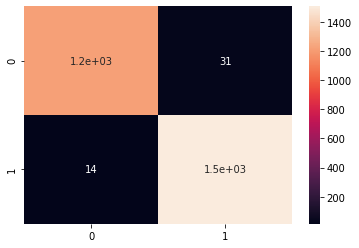

In [51]:
cm_svc = confusion_matrix(y_true[2], svc_pred[1196])
print(cm_svc)
print("accuracy : ", str(accuracy_score(y_true[2], svc_pred[1196])))
print("f1 : ", str(f1_score(y_true[2], svc_pred[1196])))
print("precision : ", str(precision_score(y_true[2], svc_pred[1196])))
print("recall : ", str(recall_score(y_true[2], svc_pred[1196])))
print(str(classification_report(y_true[2], svc_pred[1196])))
sns.heatmap(cm_svc, annot=True)

[[664  67]
 [ 33 895]]
accuracy :  0.9397227245328511
f1 :  0.9470899470899471
precision :  0.9303534303534303
recall :  0.9644396551724138
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       731
           1       0.93      0.96      0.95       928

    accuracy                           0.94      1659
   macro avg       0.94      0.94      0.94      1659
weighted avg       0.94      0.94      0.94      1659



<AxesSubplot:>

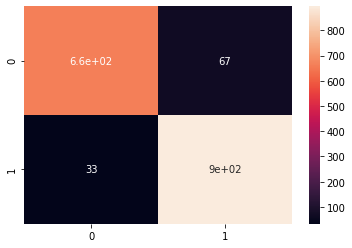

In [62]:
cm_lsvc = confusion_matrix(y_true[0], lsvc_pred[10])
print(cm_lsvc)
print("accuracy : ", str(accuracy_score(y_true[0], lsvc_pred[10])))
print("f1 : ", str(f1_score(y_true[0], lsvc_pred[10])))
print("precision : ", str(precision_score(y_true[0], lsvc_pred[10])))
print("recall : ", str(recall_score(y_true[0], lsvc_pred[10])))
print(str(classification_report(y_true[0], lsvc_pred[10])))
sns.heatmap(cm_lsvc, annot=True)

[[1226   19]
 [  11 1508]]
accuracy :  0.9891461649782923
f1 :  0.9901510177281682
precision :  0.9875573018991487
recall :  0.9927583936800527
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1245
           1       0.99      0.99      0.99      1519

    accuracy                           0.99      2764
   macro avg       0.99      0.99      0.99      2764
weighted avg       0.99      0.99      0.99      2764



<AxesSubplot:>

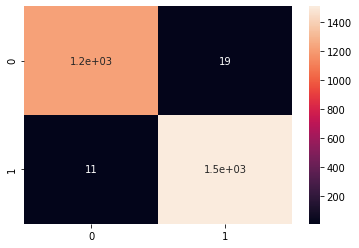

In [65]:
cm_knn = confusion_matrix(y_true[2], knn_pred[657])
print(cm_knn)
print("accuracy : ", str(accuracy_score(y_true[2], knn_pred[657])))
print("f1 : ", str(f1_score(y_true[2], knn_pred[657])))
print("precision : ", str(precision_score(y_true[2], knn_pred[657])))
print("recall : ", str(recall_score(y_true[2], knn_pred[657])))
print(str(classification_report(y_true[2], knn_pred[657])))
sns.heatmap(cm_knn, annot=True)

[[670  61]
 [ 74 854]]
accuracy :  0.918625678119349
f1 :  0.9267498643516007
precision :  0.9333333333333333
recall :  0.9202586206896551
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       731
           1       0.93      0.92      0.93       928

    accuracy                           0.92      1659
   macro avg       0.92      0.92      0.92      1659
weighted avg       0.92      0.92      0.92      1659



<AxesSubplot:>

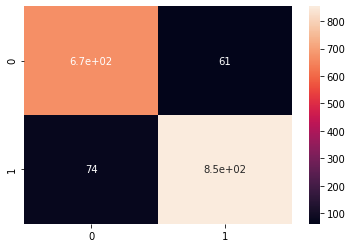

In [69]:
cm_bnb = confusion_matrix(y_true[0], bnb_pred[1])
print(cm_bnb)
print("accuracy : ", str(accuracy_score(y_true[0], bnb_pred[1])))
print("f1 : ", str(f1_score(y_true[0], bnb_pred[1])))
print("precision : ", str(precision_score(y_true[0], bnb_pred[1])))
print("recall : ", str(recall_score(y_true[0], bnb_pred[1])))
print(str(classification_report(y_true[0], bnb_pred[1])))
sns.heatmap(cm_bnb, annot=True)

[[1229   16]
 [   9 1510]]
accuracy :  0.9909551374819102
f1 :  0.9917898193760263
precision :  0.9895150720838795
recall :  0.9940750493745886
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1245
           1       0.99      0.99      0.99      1519

    accuracy                           0.99      2764
   macro avg       0.99      0.99      0.99      2764
weighted avg       0.99      0.99      0.99      2764



<AxesSubplot:>

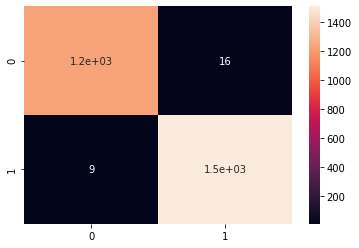

In [71]:
cm_random = confusion_matrix(y_true[2], random_pred[108])
print(cm_random)
print("accuracy : ", str(accuracy_score(y_true[2], random_pred[108])))
print("f1 : ", str(f1_score(y_true[2], random_pred[108])))
print("precision : ", str(precision_score(y_true[2], random_pred[108])))
print("recall : ", str(recall_score(y_true[2], random_pred[108])))
print(str(classification_report(y_true[2], random_pred[108])))
sns.heatmap(cm_random, annot=True)

[[1229   16]
 [  18 1501]]
accuracy :  0.9876989869753979
f1 :  0.9888010540184453
precision :  0.989452867501648
recall :  0.9881500987491771
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1245
           1       0.99      0.99      0.99      1519

    accuracy                           0.99      2764
   macro avg       0.99      0.99      0.99      2764
weighted avg       0.99      0.99      0.99      2764



<AxesSubplot:>

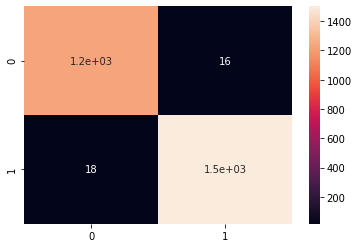

In [74]:
cm_dtree = confusion_matrix(y_true[2], dtree_pred[81])
print(cm_dtree)
print("accuracy : ", str(accuracy_score(y_true[2], dtree_pred[81])))
print("f1 : ", str(f1_score(y_true[2], dtree_pred[81])))
print("precision : ", str(precision_score(y_true[2], dtree_pred[81])))
print("recall : ", str(recall_score(y_true[2], dtree_pred[81])))
print(str(classification_report(y_true[2], dtree_pred[81])))
sns.heatmap(cm_dtree, annot=True)

In [ ]:
(('svc', 1196, 0.9837192474674384),
 ('lsvc', 10, 0.9397227245328511),
 ('knn', 657, 0.9891461649782923),
 ('bnb', 1, 0.918625678119349),
 ('random', 108, 0.9909551374819102),
 ('dtree', 81, 0.9876989869753979))

In [84]:
1440-1196

244

In [88]:
i = 0
for kernel in kernels:
    for c in C:
        for deg in degree:
            for gam in gamma:
                for decision in decision_function_shape:
                    if i == 244:
                        print(kernel, c, deg, gam, decision)
                    i+=1

rbf 1 2 scale ovo


In [76]:
i = 0
for loss in losses:
        for c in C:
            for multi in multi_class:
                if i == 10:
                    print(loss, c, multi)
                i+=1

squared_hinge 1 ovr


In [89]:
i = 0
for k in range(1, 10):
    for weight in weights:
        for algo in algorithm:
            for m in metric:
                if i == 207:
                    print(k, weight, algo, m)
                i+=1

7 uniform brute minkowski


In [106]:
np.sum(knn_acc[:288]) / 288, np.sum(knn_acc[288:288*2]) / 288, np.sum(knn_acc[288*2:288*3])/ 288, np.sum(knn_acc[288*3:288*4])/ 288, np.sum(knn_acc[288*4:])/ 288

(0.9686893041323421,
 0.9634686416402835,
 0.9619575594950955,
 0.9540425166649918,
 0.9528136663795578)

In [90]:
i = 0
for a in alpha:
        for b in binarize:
            for fit in fit_prior:
                if i == 1:
                    print(a, b, fit)
                i+=1

0 0 False


In [98]:
i = 0
for weight in class_weight:
        for maxx in max_features:
            for cri in criterion:
                for s in warm_start:
                    if i == 36:
                        print(weight, maxx, cri, s)
                    i+=1

balanced_subsample auto gini True


In [103]:
i = 0
for weight in class_weight[:-1]:
        for maxx in max_features:
            for cri in criterion:
                for split in splitter:
                    if i == 15:
                        print(weight, maxx, cri, split)
                    i+=1

None log2 entropy random


In [ ]:
[0.9852700490998364, 0.9470899470899471, 0.9901510177281682, 0.9267498643516007, 0.9917898193760263, 0.9888010540184453]
[0.9798177083333334, 0.9303534303534303, 0.9875573018991487, 0.9333333333333333, 0.9895150720838795, 0.989452867501648]
[0.9907834101382489, 0.9644396551724138, 0.9927583936800527, 0.9202586206896551, 0.9940750493745886, 0.9881500987491771]

svc lsvc knn bnb random dtree 

svc 0.9837  rbf 1 2 scale ovofor size in test_sizes[3:]:
    x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = size)
    x_train = np.array(x_train).astype(np.int8)
    y_train = np.array(y_train).astype(np.int8)
    x_test = np.array(x_test).astype(np.int8)
    y_test = np.array(y_test).astype(np.int8)
    y_train = np.where(y_train == -1, 0, y_train)
    y_test = np.where(y_test == -1, 0, y_test) 
f1 :  0.9852700490998364
precision :  0.9798177083333334
recall :  0.9907834101382489

lsvc 0.9397  squared_hinge 1 ovr
f1 :  0.9470899470899471
precision :  0.9303534303534303
recall :  0.9644396551724138

knn 0.9891  7 uniform brute minkowski
f1 :  0.9901510177281682
precision :  0.9875573018991487
recall :  0.9927583936800527

bnb 0.9186  0 0 false
f1 :  0.9267498643516007
precision :  0.9333333333333333
recall :  0.9202586206896551

random 0.9909  balanced_subsample auto gini True
f1 :  0.9917898193760263
precision :  0.9895150720838795
recall :  0.9940750493745886


dtree 0.9876  None log2 entropy random
f1 :  0.9888010540184453
precision :  0.989452867501648
recall :  0.9881500987491771

In [121]:
gaus = []
yg = []
for size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = size)
    x_train = np.array(x_train).astype(np.int8)
    y_train = np.array(y_train).astype(np.int8)
    x_test = np.array(x_test).astype(np.int8)
    y_test = np.array(y_test).astype(np.int8)
    y_train = np.where(y_train == -1, 0, y_train)
    y_test = np.where(y_test == -1, 0, y_test)
    yg.append(y_test)
    gaus.append(GaussianNB().fit(x_train, y_train).predict(x_test))

In [128]:
accuracy_score(yg[4], gaus[4])

0.6134366925064599

[[1751    1]
 [1495  623]]
accuracy :  0.6134366925064599
f1 :  0.45441283734500365
precision :  0.9983974358974359
recall :  0.29414542020774315
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1752
           1       1.00      0.29      0.45      2118

    accuracy                           0.61      3870
   macro avg       0.77      0.65      0.58      3870
weighted avg       0.79      0.61      0.57      3870



<AxesSubplot:>

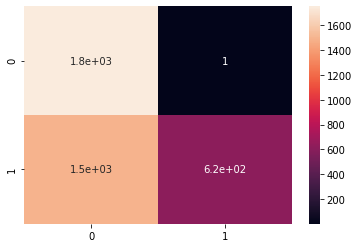

In [129]:
cm_g = confusion_matrix(yg[4], gaus[4])
print(cm_g)
print("accuracy : ", str(accuracy_score(yg[4], gaus[4])))
print("f1 : ", str(f1_score(yg[4], gaus[4])))
print("precision : ", str(precision_score(yg[4], gaus[4])))
print("recall : ", str(recall_score(yg[4], gaus[4])))
print(str(classification_report(yg[4], gaus[4])))
sns.heatmap(cm_g, annot=True)